<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_Simple_Linear_Regression_DeliveryTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Delivery_time -> Predict delivery time using sorting time
Ans: Model2 with higher Rsquared value of 0.711 and RMSE of 2.94 is the best model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dt=pd.read_csv("delivery_time.csv")
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [2]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


Text(0, 0.5, 'Sorting Time')

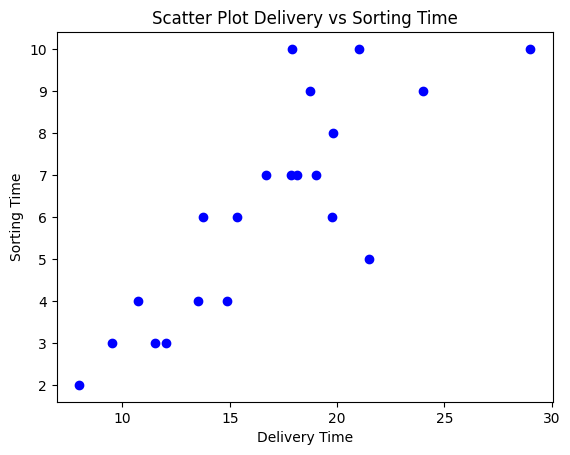

In [4]:
plt.plot(dt["Delivery Time"],dt["Sorting Time"],"bo")
plt.title("Scatter Plot Delivery vs Sorting Time")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")

<Axes: xlabel='Delivery Time', ylabel='Density'>

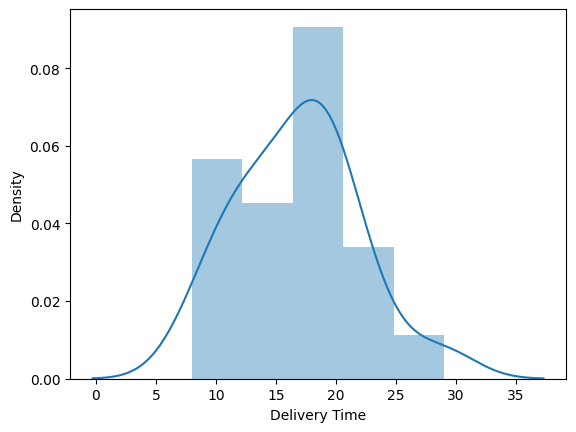

In [5]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(dt["Delivery Time"])

<Axes: xlabel='Sorting Time', ylabel='Density'>

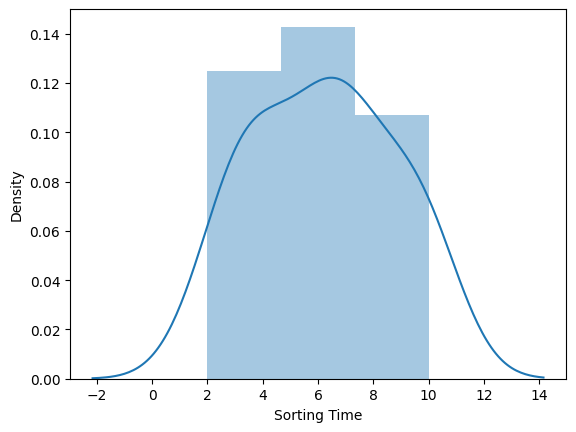

In [6]:
sns.distplot(dt["Sorting Time"])

<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

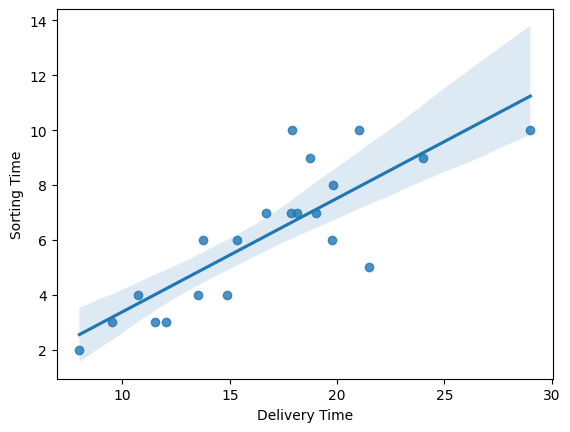

In [7]:
sns.regplot(x="Delivery Time",y="Sorting Time",data=dt)

In [8]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [9]:
dt=dt.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=dt).fit()
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        06:39:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared value 0.682
Correlation between the target variable and independent variable = 68%
Co efficients Bo= 6.58 , B1= 1.64





In [12]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

PValues are <0.05 hence both the variables are significant

In [13]:
pred = model.predict(dt)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [14]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [15]:
rmse=np.sqrt(np.mean((np.array(dt['delivery_time'])-np.array(pred))**2))
rmse

2.7916503270617654

In [16]:
pred.corr(dt.delivery_time)

0.8259972607955325

Text(0, 0.5, 'Delivery Time')

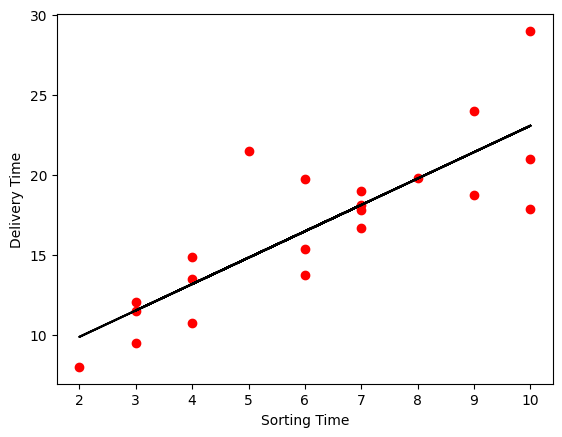

In [17]:
plt.scatter(x=dt['sorting_time'],y=dt['delivery_time'],color='red')
plt.plot(dt['sorting_time'],pred,color='Black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [18]:
#Log Model
model1=smf.ols("delivery_time~np.log(sorting_time)",data=dt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.64e-06
Time:                        06:39:58   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
pred1=model1.predict(dt)
pred1

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [20]:
model1.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [21]:
rmse=np.sqrt(np.mean((np.array(dt['delivery_time'])-np.array(pred1))**2))
rmse

2.733171476682066

In [22]:
pred1.corr(dt.delivery_time)

0.8339325279256242

Text(0, 0.5, 'Delivery Time')

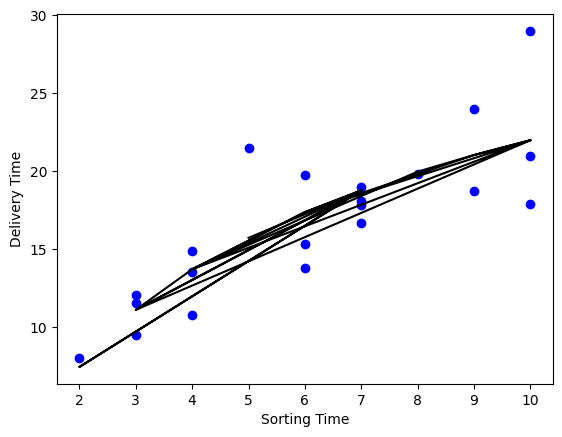

In [23]:
plt.scatter(x=dt['sorting_time'],y=dt['delivery_time'],color='blue')
plt.plot(dt['sorting_time'],pred1,color='Black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [24]:
#Exponential Model
model2=smf.ols("np.log(delivery_time)~sorting_time",data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Fri, 01 Mar 2024   Prob (F-statistic):           1.59e-06
Time:                           06:39:58   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model2.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [26]:
pred_log=model2.predict(dt['sorting_time'])
pred_log


0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [27]:
pred2=np.exp(pred_log)
pred2

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [28]:
rmse=np.sqrt(np.mean((np.array(dt['delivery_time'])-np.array(pred2))**2))
rmse

2.9402503230562007

In [29]:
pred2.corr(dt.delivery_time)

0.8085780108289259

Text(0, 0.5, 'Delivery Time')

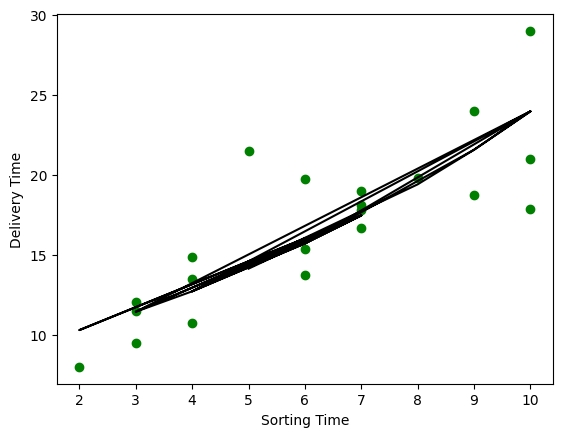

In [30]:
plt.scatter(x=dt['sorting_time'],y=dt['delivery_time'],color='green')
plt.plot(dt['sorting_time'],pred2,color='Black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [31]:
#Quadratic model
sorting_time_sq=dt.sorting_time*dt.sorting_time
dt["sorting_time_sq"]=pd.DataFrame(sorting_time_sq)
dt

,delivery_time,sorting_time,sorting_time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [32]:
model3=smf.ols("np.log(delivery_time)~sorting_time_sq", data= dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.621
Model:                               OLS   Adj. R-squared:                  0.601
Method:                    Least Squares   F-statistic:                     31.18
Date:                   Fri, 01 Mar 2024   Prob (F-statistic):           2.20e-05
Time:                           06:39:58   Log-Likelihood:                 4.9564
No. Observations:                     21   AIC:                            -5.913
Df Residuals:                         19   BIC:                            -3.824
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.4290      0.076     32.014      0.000       2.270       2.588
sorting_time_sq     0.0078      0.001      5.584      0.000       0.005       0.011
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.004
Skew:                           0.033   Prob(JB):                        0.998
Kurtosis:                       3.000   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model3.resid

0    -0.161911
1     0.049279
2     0.274262
3     0.119328
4     0.160863
5     0.022224
6     0.134484
7    -0.247700
8    -0.321633
9    -0.127532
10    0.060630
11   -0.178504
12    0.004255
13   -0.056645
14   -0.011588
15    0.146608
16   -0.087853
17    0.086509
18   -0.380680
19    0.070927
20    0.444676
dtype: float64

In [34]:
pred3=model3.predict(dt)
pred3

0     3.206433
1     2.553410
2     2.708892
3     3.058726
4     3.206433
5     2.708892
6     2.809955
7     2.498992
8     3.206433
9     3.058726
10    2.926566
11    2.553410
12    2.809955
13    2.498992
14    2.498992
15    2.553410
16    2.708892
17    2.809955
18    2.460121
19    2.809955
20    2.623377
dtype: float64

In [35]:
pred4=np.exp(pred3)
pred4

0     24.690864
1     12.850853
2     15.012631
3     21.300397
4     24.690864
5     15.012631
6     16.609171
7     12.170215
8     24.690864
9     21.300397
10    18.663435
11    12.850853
12    16.609171
13    12.170215
14    12.170215
15    12.850853
16    15.012631
17    16.609171
18    11.706230
19    16.609171
20    13.782187
dtype: float64

In [36]:
rmse=np.sqrt(np.mean((np.array(dt['delivery_time'])-np.array(pred4))**2))
rmse

3.214009746956573

In [37]:
pred4.corr(dt.delivery_time)

0.7685511301648157

Text(0, 0.5, 'Delivery Time')

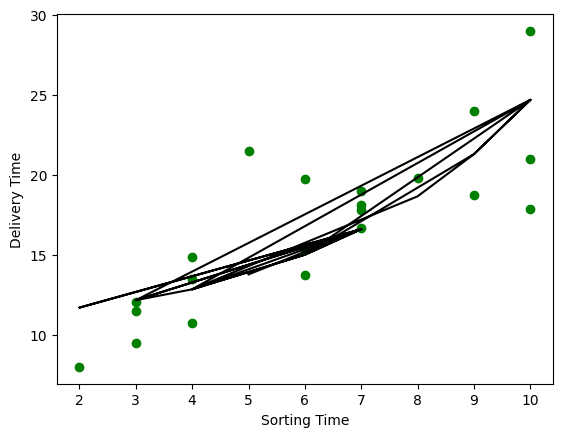

In [38]:
plt.scatter(x=dt['sorting_time'],y=dt['delivery_time'],color='green')
plt.plot(dt['sorting_time'],pred4,color='Black')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')